In [32]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import zscore
import joblib

# For better display
pd.set_option('display.max_columns', None)
print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


In [ ]:
# Load Dataset
df = pd.read_csv("electric_vehicles_spec_2025.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("/", "_").str.lower()

print("Shape:", df.shape)
display(df.head())

# Quick summary
display(df.info())
display(df.describe())


Shape: (478, 22)


,brand,model,top_speed_kmh,battery_capacity_kwh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,78.0,CCS,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kwh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

None

,top_speed_kmh,battery_capacity_kwh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,276.000000,471.000000,478.000000,478.000000,478.000000,477.000000,452.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,485.293478,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,1210.819733,241.461128,34.317532,103.287335,2.730696,58.205012,737.851774,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,150.000000,305.000000,143.000000,320.000000,4.800000,80.000000,500.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,216.000000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,324.000000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,7920.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,9.000000,5908.000000,2080.000000,1986.000000


In [ ]:
# Data Cleaning

df = df.drop_duplicates().reset_index(drop=True)

print("Missing values before cleaning:")
display(df.isnull().sum())
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna("Unknown", inplace=True)

print("Missing values after cleaning:")
display(df.isnull().sum())
print("✅ Data cleaned successfully.")

Missing values before cleaning:


brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kwh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

Missing values after cleaning:


brand                        0
model                        0
top_speed_kmh                0
battery_capacity_kwh         0
battery_type                 0
number_of_cells              0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
fast_charge_port             0
towing_capacity_kg           0
cargo_volume_l               0
seats                        0
drivetrain                   0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
source_url                   0
dtype: int64

✅ Data cleaned successfully.


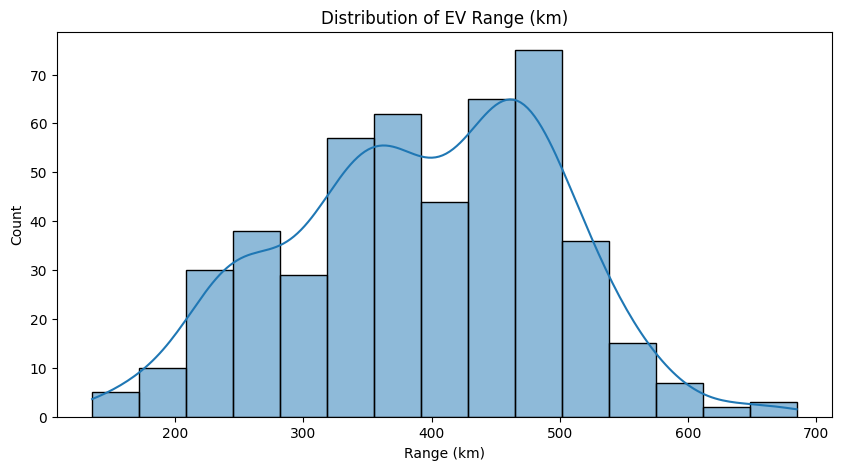

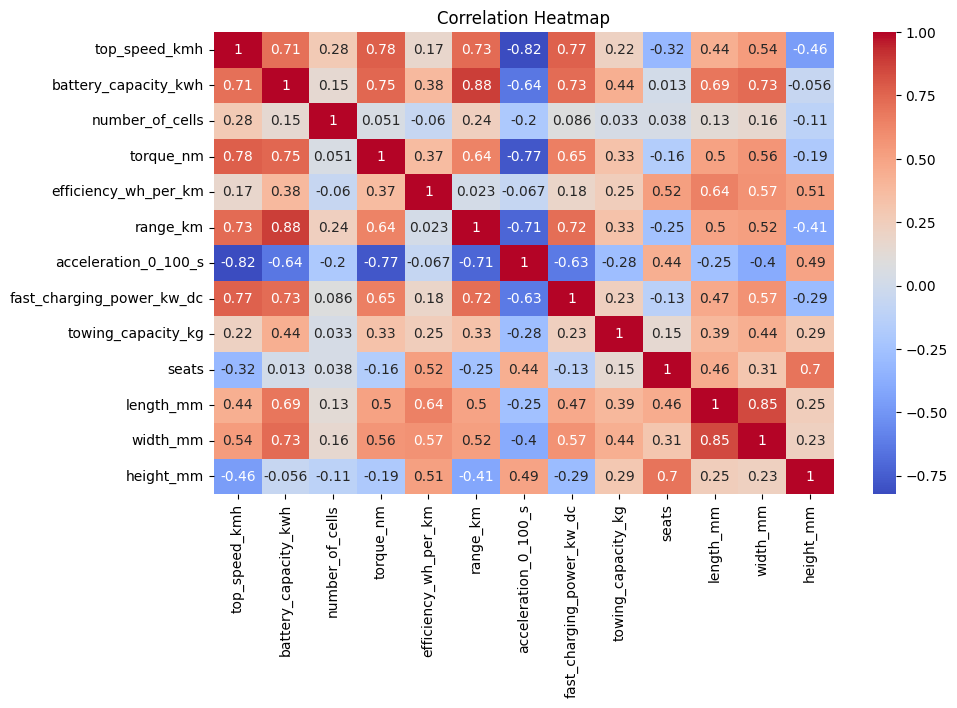

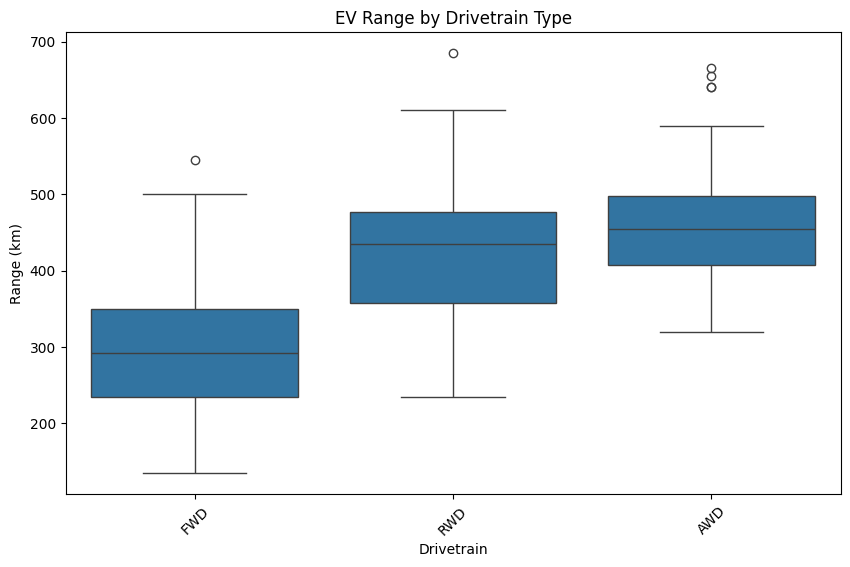

✅ EDA completed.


In [35]:
# Exploratory Data Analysis (EDA)

# Histogram of EV Range (as DataFrame)
plt.figure(figsize=(10,5))
sns.histplot(data=df[["range_km"]], x="range_km", kde=True)  # Pass as DataFrame
plt.title("Distribution of EV Range (km)")
plt.xlabel("Range (km)")
plt.ylabel("Count")
plt.show()

# Correlation heatmap (numeric columns only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Boxplot of EV Range vs Drivetrain
if "drivetrain" in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='drivetrain', y='range_km', data=df)
    plt.title("EV Range by Drivetrain Type")
    plt.xlabel("Drivetrain")
    plt.ylabel("Range (km)")
    plt.xticks(rotation=45)
    plt.show()
print("✅ EDA completed.")

In [ ]:
# Feature Engineering & Preprocessing

# Target variable
target = "range_km"
y = df[target]

# Feature matrix: keep all columns except target and source_url
X = df.drop(columns=[target, "source_url"])  # brand and model are kept

# Define numeric and categorical columns based on X
numeric_cols = [col for col in X.select_dtypes(include=np.number).columns]
cat_cols = [col for col in X.select_dtypes(exclude=np.number).columns]

# Preprocessor
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)
print("✅ Preprocessor defined.")

✅ Preprocessor defined.


In [ ]:
# Model Training & Evaluation

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse')
}

# Store results
results = {}

for name, model in models.items():
    # Create pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Fit and predict
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    z_scores = zscore(y_test - y_pred)
    
    results[name] = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2,
        "Z-scores first 5": z_scores[:5]
    }

# Display results
for model_name, metrics in results.items():
    print(f"\n📌 {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


📌 Linear Regression
MSE: 249.15349214165767
RMSE: 15.784596673391995
MAE: 12.25086829567462
R²: 0.9764544373950614
Z-scores first 5: [0.38070522 0.70532311 0.7117031  0.25584059 1.29313485]

📌 Random Forest
MSE: 410.9764843749999
RMSE: 20.2725549542972
MAE: 14.709895833333333
R²: 0.9611618024743261
Z-scores first 5: [-0.18234858  0.68462641 -0.75702914 -1.01959871 -0.3532665 ]

📌 XGBoost
MSE: 218.6848602294922
RMSE: 14.78799716761848
MAE: 10.747851371765137
R²: 0.9793338179588318
Z-scores first 5: [-0.06879436  0.90511493 -0.0125098  -0.60350598 -0.06360303]


In [38]:
joblib.dump(pipeline, f"{model_name.replace(' ', '_').lower()}_model.pkl")
print(f"Model saved as {model_name.replace(' ', '_').lower()}_model.pkl")

Model saved as xgboost_model.pkl
